# Visualization of the Blobinator Data Augmentation

In [3]:
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from configs.defaults import _C as cfg
from modules.ptn.pytorch.blobinator_dataset import BlobinatorTrainDataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


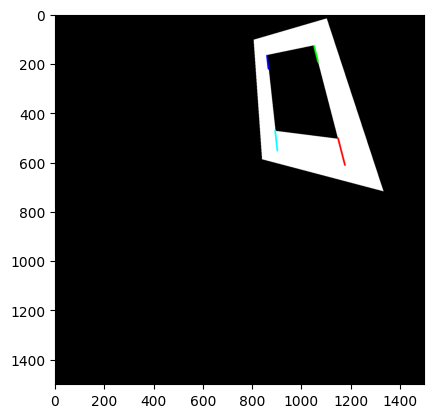

In [45]:
dataset = BlobinatorTrainDataset(cfg)

img = None
for _, data, color in zip(range(4), dataset, matplotlib.colors.BASE_COLORS.values()):
    _, mapped_image, _, mapped_keypoint, *_ = data
    if img is None:
        img = np.stack((mapped_image["img"].reshape((1500, 1500)),) * 3, axis=-1) # Convert to RGB
    loc, scale, rotation = mapped_keypoint
    x = (loc[0] + 1) * 750
    y = (loc[1] + 1) * 750
    x2 = x - np.sin(rotation) * scale
    y2 = y + np.cos(rotation) * scale
    color = (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
    cv.line(img, (int(x), int(y)), (int(x2), int(y2)), color, 5)
plt.imshow(img)
